<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#Prepare" data-toc-modified-id="Prepare-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prepare</a></span></li><li><span><a href="#Core" data-toc-modified-id="Core-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Core</a></span></li><li><span><a href="#Feature-importances" data-toc-modified-id="Feature-importances-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature importances</a></span></li></ul></li></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import apps.tkconfig as tkconfig
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
import lightgbm as lgb

SONG = 1
WHO = 7
TRAIN_ORDER = 3

In [2]:
sensor_data = Sensor(verbose=1)

In [3]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 4, 2)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 4, 2)) 
            
    return pfs

In [4]:
pfs = []
for drumer in range(WHO, WHO + 1):
    ppf = gogo(drumer, SONG, TRAIN_ORDER)
    pfs.append(ppf)

100%|██████████| 3/3 [00:35<00:00, 11.81s/it]


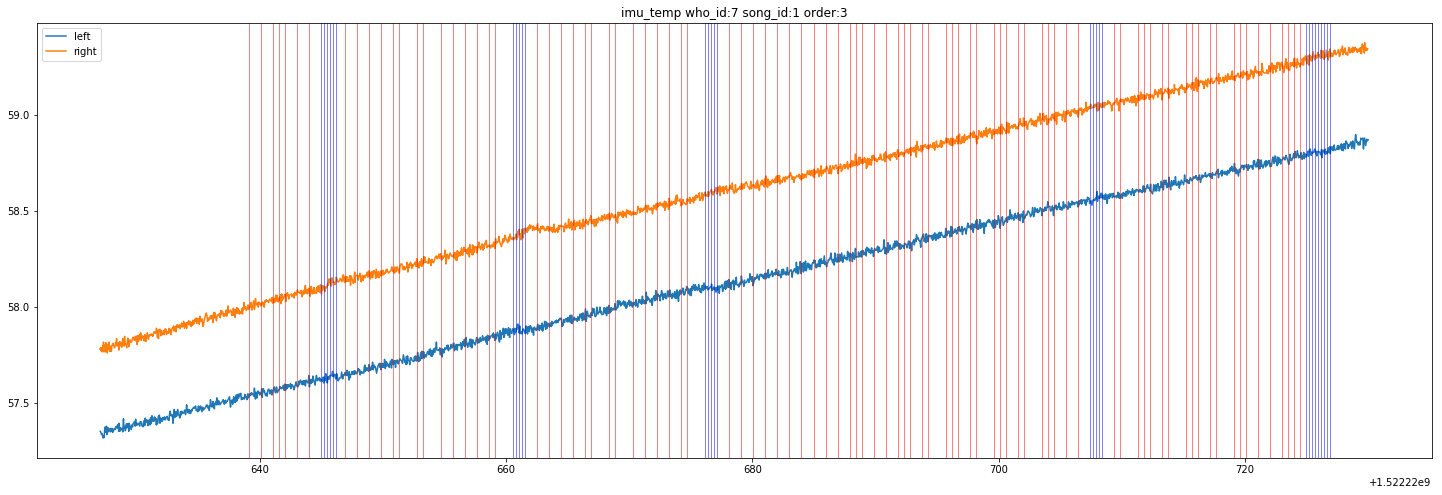

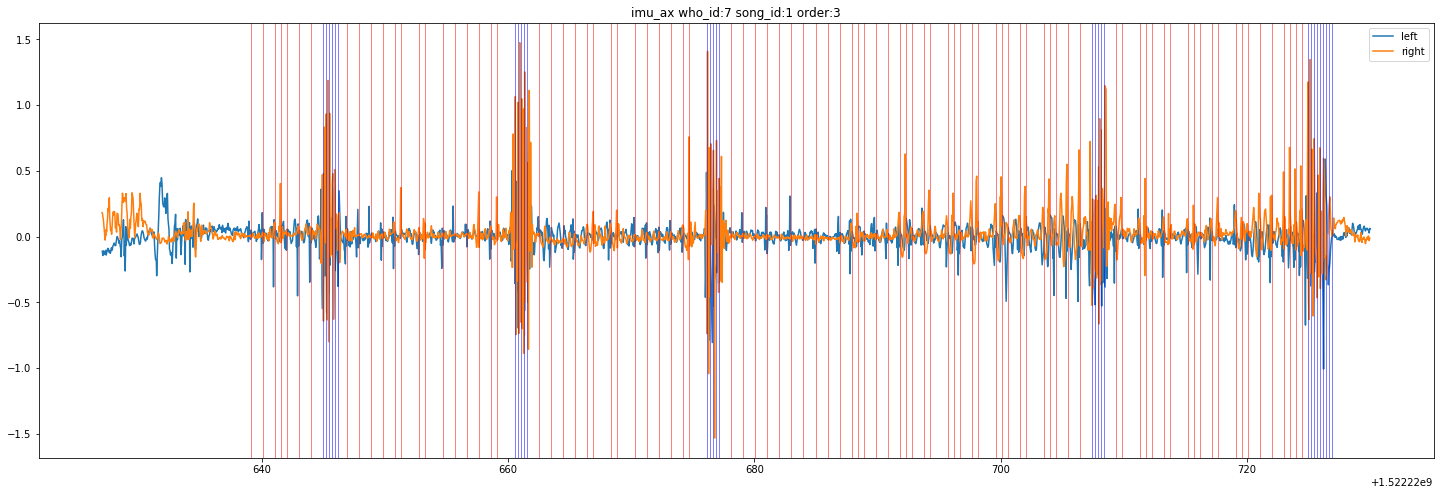

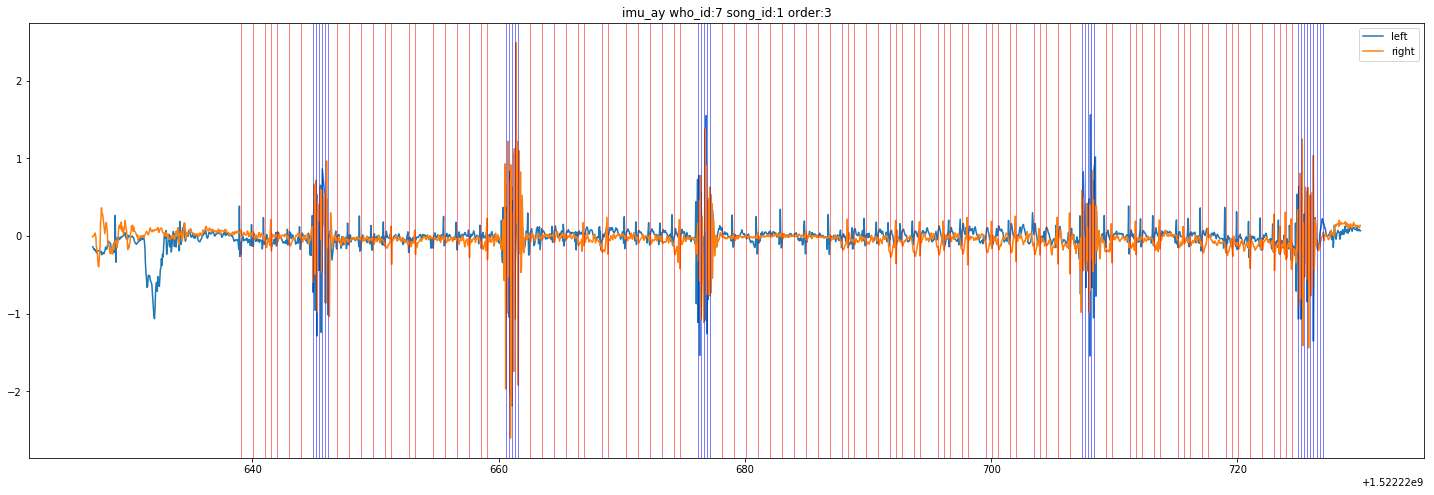

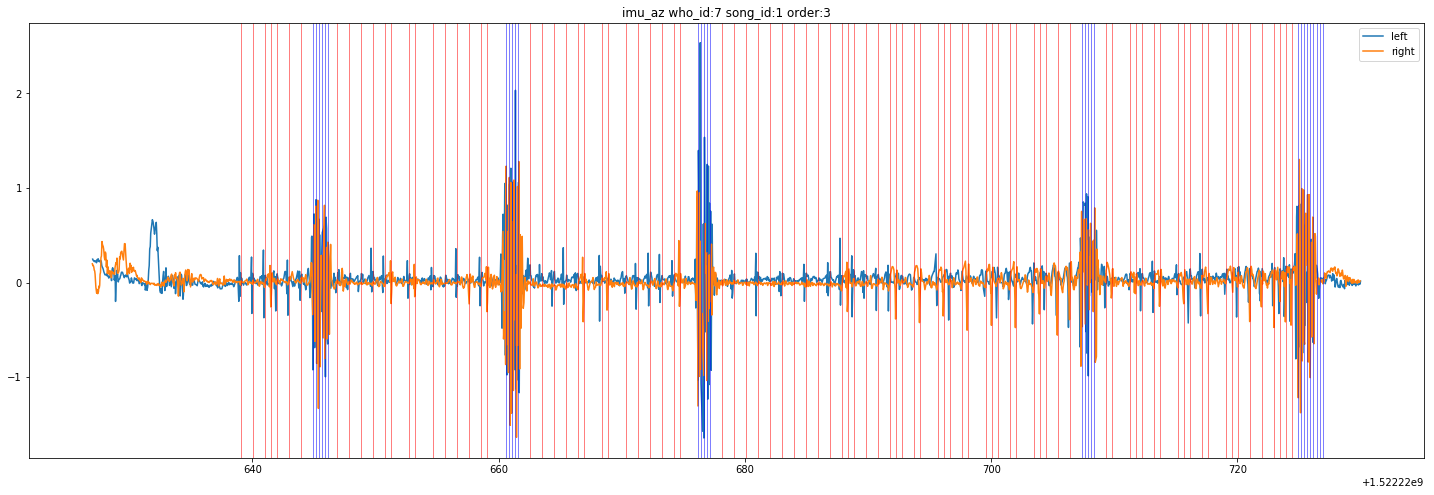

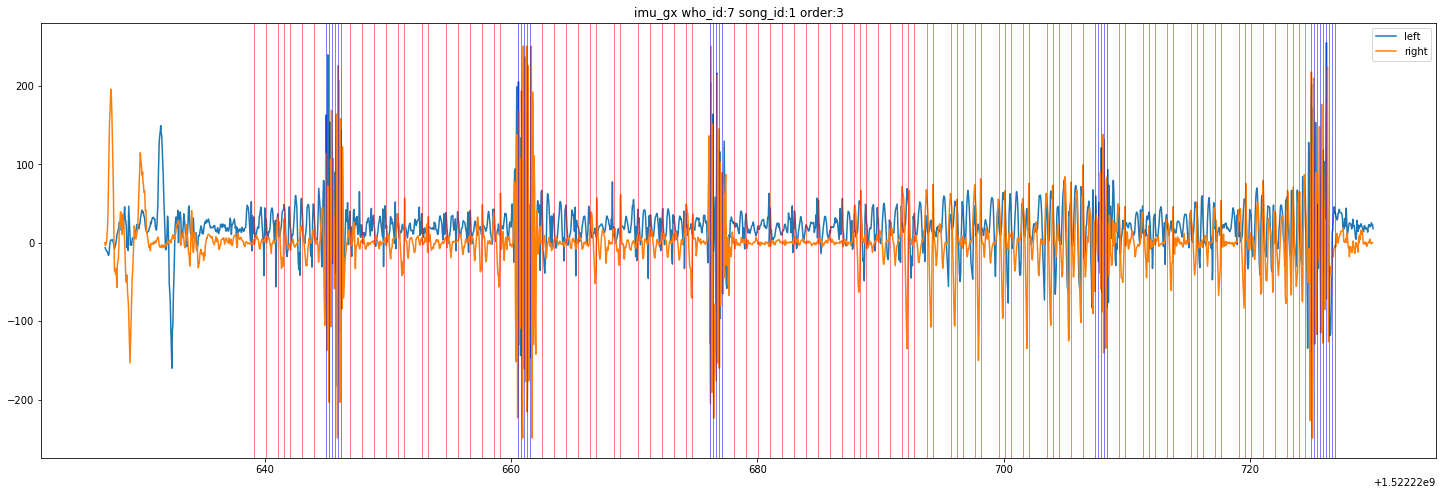

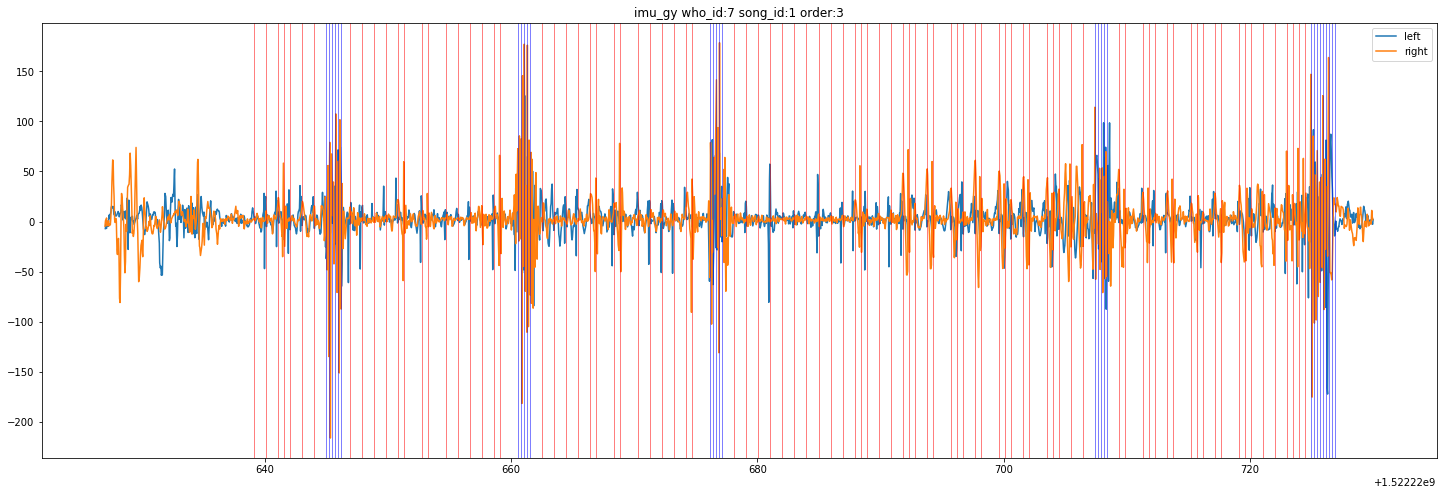

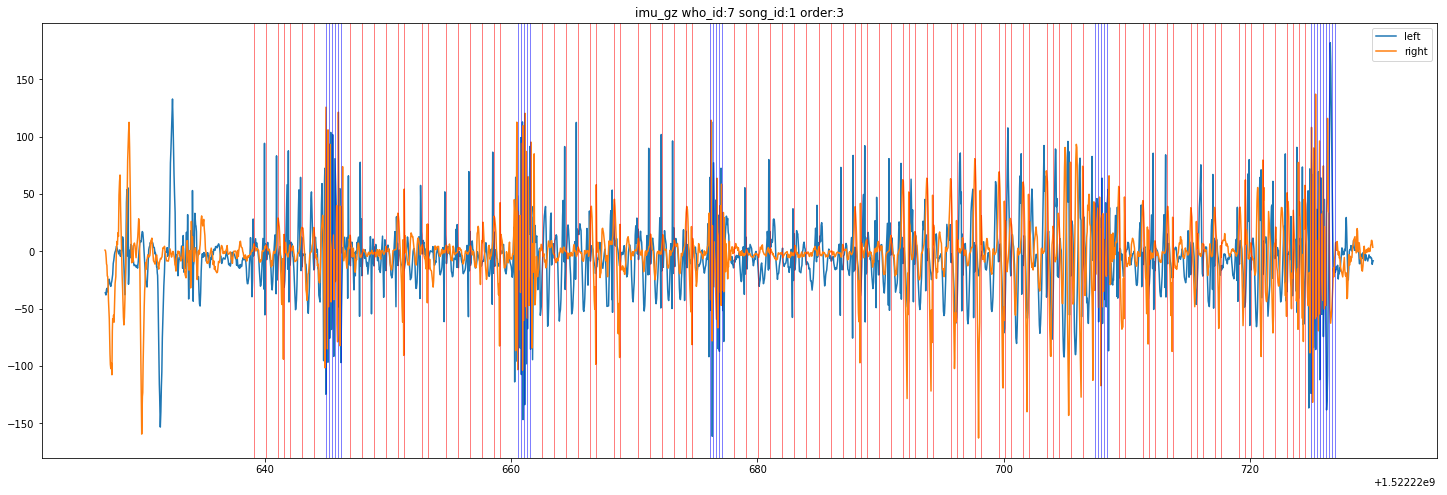

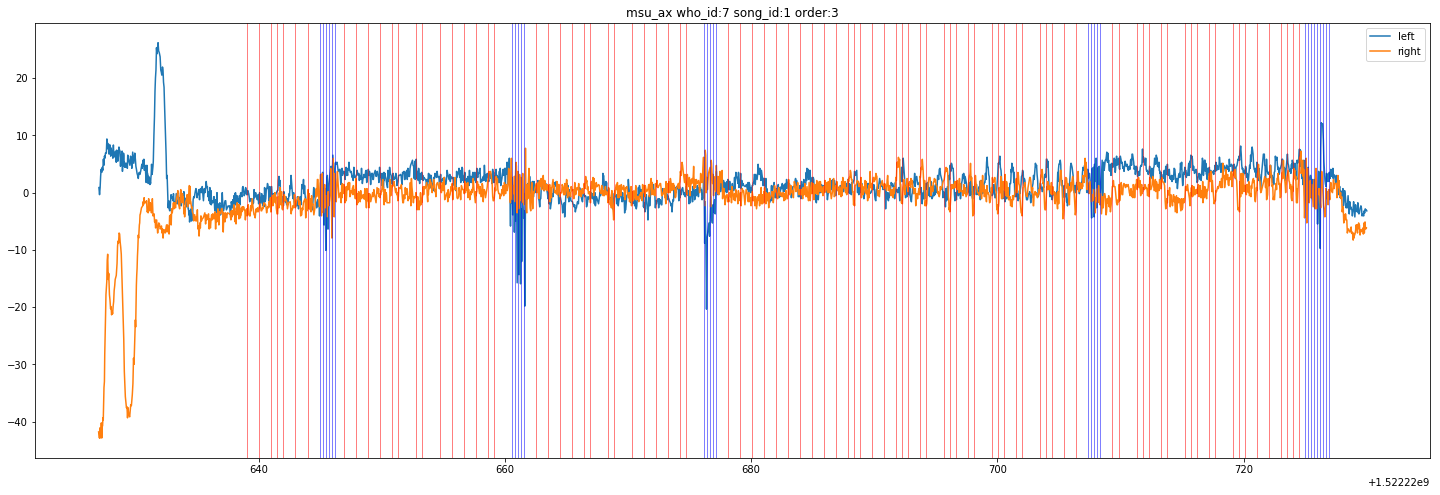

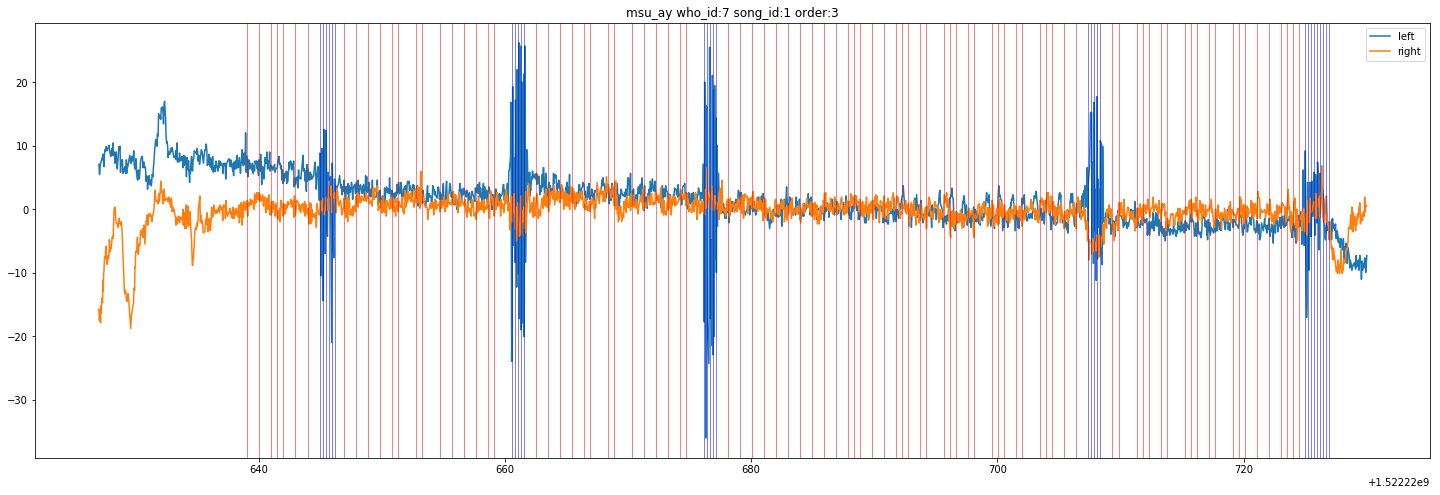

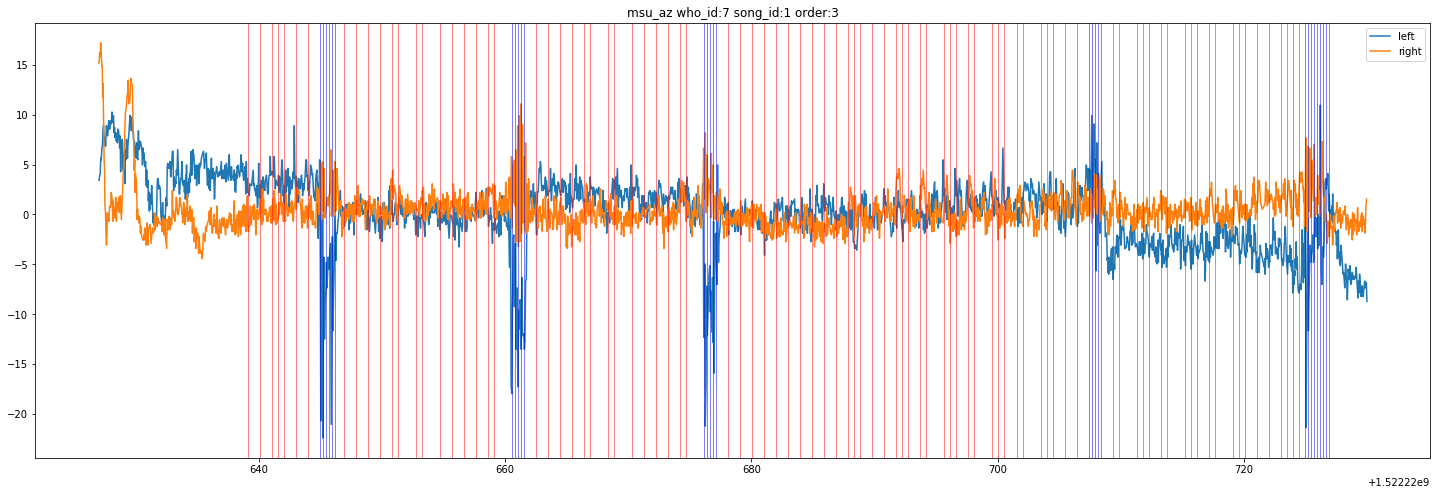

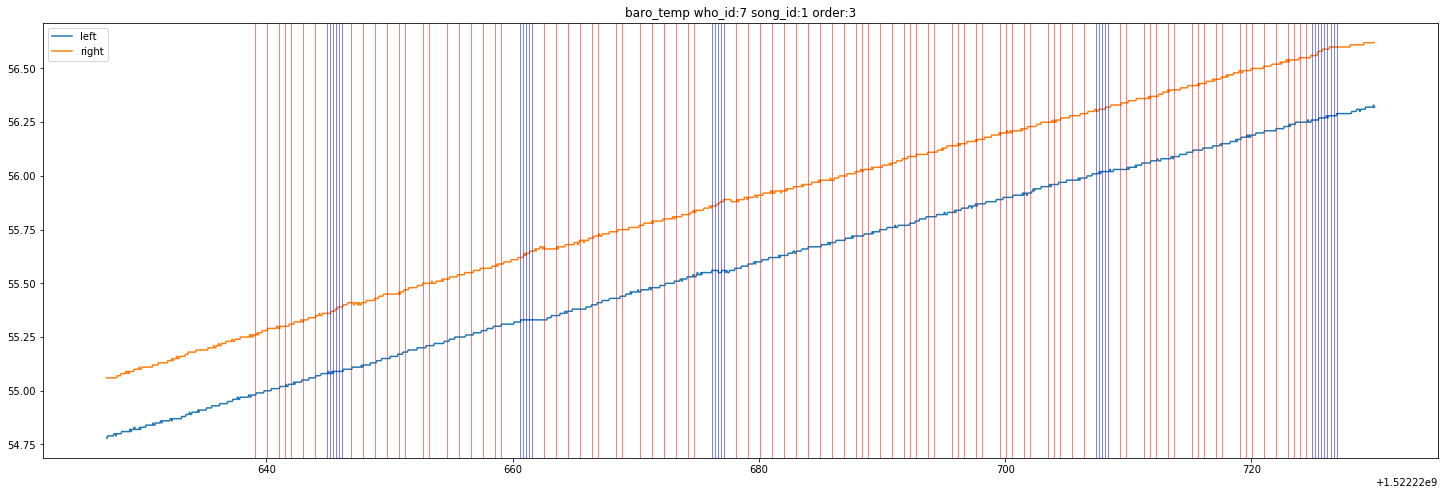

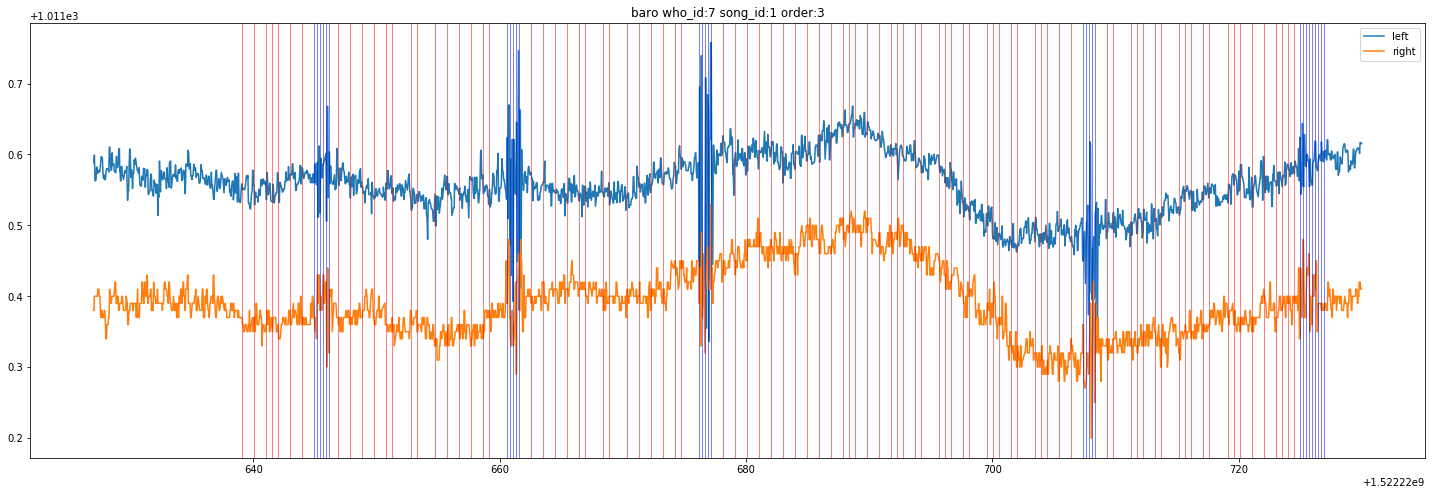

In [5]:
pfs[0][2].plot_global_event()

In [6]:
pfs[0][2].event_primitive_df

,hit_type,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,1,0.161398,0.009149,0.226400,27.544187,155.602559,41.476200,0.035198,914.284793,0.136444,...,0.333333,0.333333,0.166667,0.333333,0.741593,0.158599,-0.344552,-0.325007,0.274357,0.441317
1,0,0.051932,0.000320,0.077750,14.292314,25.634203,20.284500,0.003017,229.904437,0.058613,...,0.500000,0.500000,0.500000,0.500000,0.636195,-0.559993,-0.984034,0.504355,0.989369,0.417667
2,0,0.063429,0.000296,0.092800,41.372795,143.525825,61.537600,0.004319,1855.233958,0.057697,...,0.400000,0.400000,0.400000,0.600000,0.688542,-0.429279,0.139237,-0.265110,0.337604,0.748213
3,0,0.146244,0.007067,0.218800,33.530377,288.641965,53.580800,0.028455,1412.928156,0.117970,...,0.200000,0.400000,0.400000,0.200000,-0.981746,-0.814924,0.809214,0.762970,0.875323,0.397144
4,1,0.134168,0.010103,0.196778,38.466623,830.920520,55.346556,0.028104,2310.601591,0.116863,...,0.600000,0.400000,0.600000,0.400000,0.935283,0.490611,0.171105,-0.270527,0.714948,-0.259272
5,0,0.045432,0.000242,0.066000,13.692567,16.121677,18.993429,0.002306,203.608076,0.043290,...,0.333333,0.166667,0.333333,0.166667,0.306249,-0.269981,-0.973191,0.135456,0.109029,0.949058
6,0,0.077618,0.000268,0.122833,43.741896,94.181087,64.167167,0.006292,2007.534539,0.079378,...,0.750000,0.750000,0.500000,0.750000,-0.591846,-0.801130,0.940763,-0.744096,-0.287310,0.713494
7,0,0.183479,0.015068,0.272000,30.820519,508.840634,47.491600,0.048732,1458.745053,0.121165,...,0.200000,0.200000,0.200000,0.200000,-0.470455,-0.433981,0.438249,0.217974,-0.710316,0.501600
8,1,0.213020,0.036626,0.320500,47.796795,573.937465,65.856750,0.082003,2858.471037,0.134325,...,0.333333,0.222222,0.333333,0.111111,0.861114,-0.651689,-0.830610,0.522338,0.915121,0.752960
9,0,0.062251,0.000247,0.095500,21.716757,129.853613,32.147167,0.004122,601.471139,0.059170,...,0.250000,0.125000,0.500000,0.125000,-0.626791,0.519679,-0.975445,0.814630,0.919683,0.976103


In [7]:
train_df = pfs[0][2].event_primitive_df

# LGBM training

## Prepare

In [8]:
x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']


x_valid_1 = pfs[0][0].event_primitive_df.drop(['hit_type'], axis=1)
y_valid_1 = pfs[0][0].event_primitive_df['hit_type']

x_valid_2 = pfs[0][1].event_primitive_df.drop(['hit_type'], axis=1)
y_valid_2 = pfs[0][1].event_primitive_df['hit_type']

train_df.head(15)

,hit_type,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,1,0.161398,0.009149,0.226400,27.544187,155.602559,41.476200,0.035198,914.284793,0.136444,...,0.333333,0.333333,0.166667,0.333333,0.741593,0.158599,-0.344552,-0.325007,0.274357,0.441317
1,0,0.051932,0.000320,0.077750,14.292314,25.634203,20.284500,0.003017,229.904437,0.058613,...,0.500000,0.500000,0.500000,0.500000,0.636195,-0.559993,-0.984034,0.504355,0.989369,0.417667
2,0,0.063429,0.000296,0.092800,41.372795,143.525825,61.537600,0.004319,1855.233958,0.057697,...,0.400000,0.400000,0.400000,0.600000,0.688542,-0.429279,0.139237,-0.265110,0.337604,0.748213
3,0,0.146244,0.007067,0.218800,33.530377,288.641965,53.580800,0.028455,1412.928156,0.117970,...,0.200000,0.400000,0.400000,0.200000,-0.981746,-0.814924,0.809214,0.762970,0.875323,0.397144
4,1,0.134168,0.010103,0.196778,38.466623,830.920520,55.346556,0.028104,2310.601591,0.116863,...,0.600000,0.400000,0.600000,0.400000,0.935283,0.490611,0.171105,-0.270527,0.714948,-0.259272
5,0,0.045432,0.000242,0.066000,13.692567,16.121677,18.993429,0.002306,203.608076,0.043290,...,0.333333,0.166667,0.333333,0.166667,0.306249,-0.269981,-0.973191,0.135456,0.109029,0.949058
6,0,0.077618,0.000268,0.122833,43.741896,94.181087,64.167167,0.006292,2007.534539,0.079378,...,0.750000,0.750000,0.500000,0.750000,-0.591846,-0.801130,0.940763,-0.744096,-0.287310,0.713494
7,0,0.183479,0.015068,0.272000,30.820519,508.840634,47.491600,0.048732,1458.745053,0.121165,...,0.200000,0.200000,0.200000,0.200000,-0.470455,-0.433981,0.438249,0.217974,-0.710316,0.501600
8,1,0.213020,0.036626,0.320500,47.796795,573.937465,65.856750,0.082003,2858.471037,0.134325,...,0.333333,0.222222,0.333333,0.111111,0.861114,-0.651689,-0.830610,0.522338,0.915121,0.752960
9,0,0.062251,0.000247,0.095500,21.716757,129.853613,32.147167,0.004122,601.471139,0.059170,...,0.250000,0.125000,0.500000,0.125000,-0.626791,0.519679,-0.975445,0.814630,0.919683,0.976103


## Core

In [31]:
train_set = lgb.Dataset(x, y)
valid_1_set = lgb.Dataset(x_valid_1, y_valid_1, free_raw_data=False)
valid_2_set = lgb.Dataset(x_valid_2, y_valid_2, free_raw_data=False)
watchlist = [valid_1_set, valid_2_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'binary',
#     'min_data_in_leaf': 10,
#    'max_depth': 10,
    'num_leaves': 2 ** 4,
    'max_bin': 127,
    'verbosity': 0,
    'metric': 'auc'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist, num_boost_round=100, verbose_eval=5)
# y_test = model.predict(x_test)

# When CV, valid_0 means the front 75% training, the last 25% validating
#          valid_1 means the front 75% training, the last "len(test set)" validating
#
# When LGBM running, valid_0 means 100% training, the last "len(test set)" validating.
#
# Use CV valid_0 auc score to predict result!

[5]	valid_0's auc: 0.897417	valid_1's auc: 0.891236
[10]	valid_0's auc: 0.913981	valid_1's auc: 0.907369
[15]	valid_0's auc: 0.91708	valid_1's auc: 0.913877
[20]	valid_0's auc: 0.913326	valid_1's auc: 0.913533
[25]	valid_0's auc: 0.909366	valid_1's auc: 0.918836
[30]	valid_0's auc: 0.910468	valid_1's auc: 0.921143
[35]	valid_0's auc: 0.912844	valid_1's auc: 0.921591
[40]	valid_0's auc: 0.917769	valid_1's auc: 0.922486
[45]	valid_0's auc: 0.915324	valid_1's auc: 0.920282
[50]	valid_0's auc: 0.913636	valid_1's auc: 0.922727
[55]	valid_0's auc: 0.916529	valid_1's auc: 0.922762
[60]	valid_0's auc: 0.915978	valid_1's auc: 0.922417
[65]	valid_0's auc: 0.918905	valid_1's auc: 0.923898
[70]	valid_0's auc: 0.919972	valid_1's auc: 0.926136
[75]	valid_0's auc: 0.922934	valid_1's auc: 0.92562
[80]	valid_0's auc: 0.922176	valid_1's auc: 0.925792
[85]	valid_0's auc: 0.923623	valid_1's auc: 0.925448
[90]	valid_0's auc: 0.922727	valid_1's auc: 0.926653
[95]	valid_0's auc: 0.923795	valid_1's auc: 0.929

## Feature importances

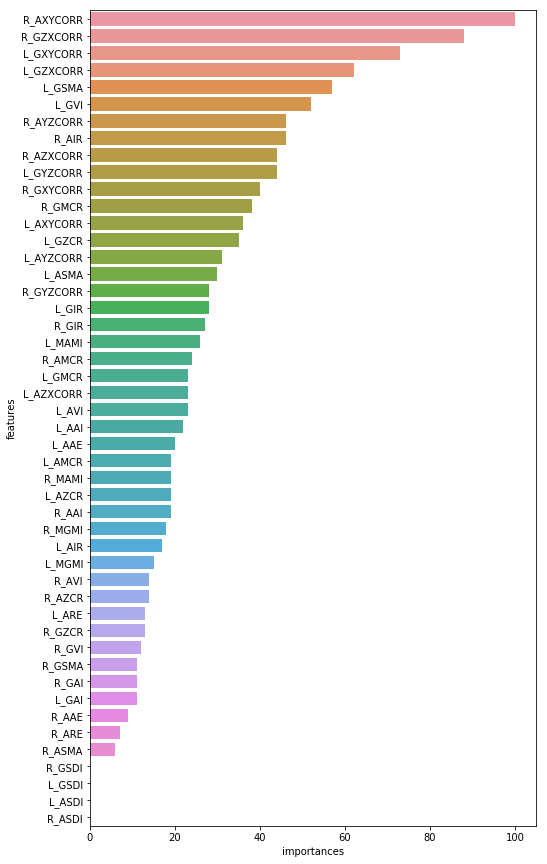

In [29]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 15))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()